<html>
    <a href=""><img loc='Wild_Fire_SM.jpg' /></a>
</html>

<html>
    <body style="background-color:blue;">
        <h1 align="center", style="color:blue;"> Wild Fires Data Analysis</h1>
        <p>
            <a href="https://www.kaggle.com/capcloudcoder/us-wildfire-data-plus-other-attributes">
                <img src="https://media2.govtech.com/images/940*627/107176_fireman.jpg" alt="knn" width="500" height="532">
            </a>
        </p>
    </body>
</html>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
import requests

In [2]:
df = pd.read_csv("WildFires.csv")
df_orig = df.copy() 

### Numerical Summaries:

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        55367 non-null  int64  
 1   Unnamed: 0.1      55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16  disc_pre_year     55367 non-null  int64 

In [5]:
df.var()

Unnamed: 0        2.554633e+08
Unnamed: 0.1      2.554633e+08
fire_size         2.183599e+08
latitude          4.521685e+01
longitude         2.521171e+02
disc_pre_year     4.336076e+01
dstation_m        6.386781e+08
wstation_wban     1.667121e+09
wstation_byear    5.462879e+02
wstation_eyear    4.580381e+01
Vegetation        3.131207e+01
fire_mag          7.193319e+02
Temp_pre_30       1.095702e+02
Temp_pre_15       1.130778e+02
Temp_pre_7        1.168125e+02
Temp_cont         1.116310e+02
Wind_pre_30       4.435931e+00
Wind_pre_15       4.505844e+00
Wind_pre_7        4.578348e+00
Wind_cont         4.123379e+00
Hum_pre_30        9.663926e+02
Hum_pre_15        9.636394e+02
Hum_pre_7         9.503585e+02
Hum_cont          9.726688e+02
Prec_pre_30       1.255525e+04
Prec_pre_15       3.239944e+03
Prec_pre_7        9.737724e+02
Prec_cont         3.570913e+03
remoteness        2.098575e-02
dtype: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,55367.0,27683.000000,15983.220514,0.000000,13841.500000,27683.000000,41524.500000,55366.000000
Unnamed: 0.1,55367.0,27683.000000,15983.220514,0.000000,13841.500000,27683.000000,41524.500000,55366.000000
fire_size,55367.0,2104.645161,14777.005364,0.510000,1.200000,4.000000,20.000000,606945.000000
latitude,55367.0,36.172866,6.724348,17.956533,32.265960,34.600000,38.975235,69.849500
longitude,55367.0,-94.757971,15.878194,-165.936000,-102.541513,-91.212359,-82.847500,-65.285833
disc_pre_year,55367.0,2003.765474,6.584889,1991.000000,1999.000000,2005.000000,2009.000000,2015.000000
dstation_m,55367.0,40256.474678,25272.081410,6.166452,21373.361515,35621.334820,53985.904315,224153.661800
wstation_wban,55367.0,61029.607311,40830.393541,100.000000,13927.000000,73803.000000,99999.000000,99999.000000
wstation_byear,55367.0,1979.341900,23.372803,1931.000000,1973.000000,1978.000000,2004.000000,2014.000000
wstation_eyear,55367.0,2015.480990,6.767851,1993.000000,2010.000000,2020.000000,2020.000000,2020.000000


## Research Problem and Questions
### 1.Have wildfires become more or less frequent over time?
### 2.What states are the most and least fire-prone?

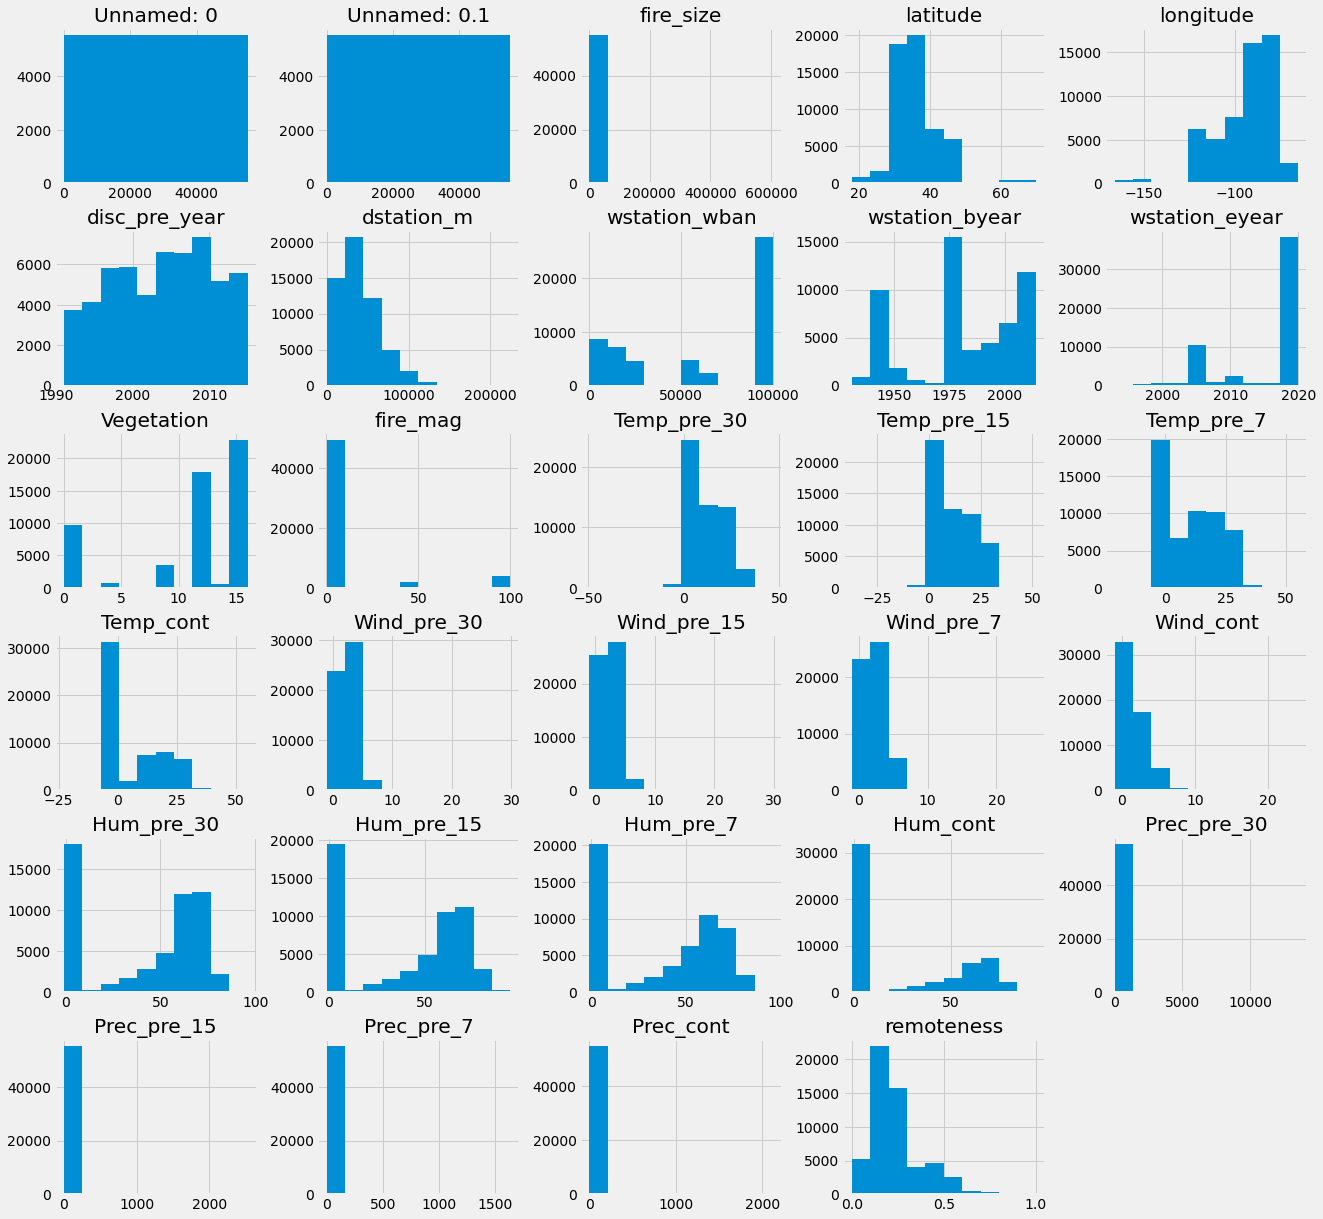

In [7]:
p = df.hist(figsize = (20,20))

### 1.Have wildfires become more or less frequent over time?

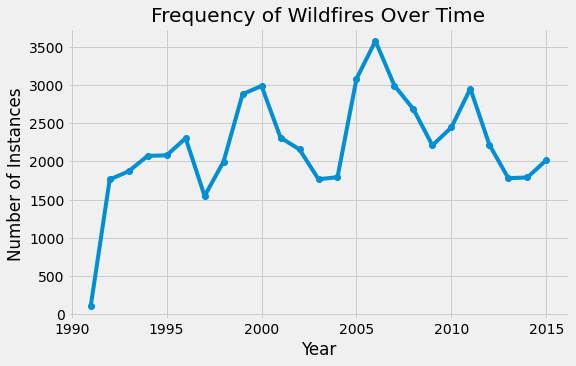

In [8]:
df_year = df[['disc_pre_year']]
df_year['disc_pre_year'].value_counts(sort=False).plot(kind="line",marker='o', figsize=(8,5))
plt.title('Frequency of Wildfires Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Instances')
plt.show()

#### 2006 has the most number of fires and the number of fires have gone up since the 90s

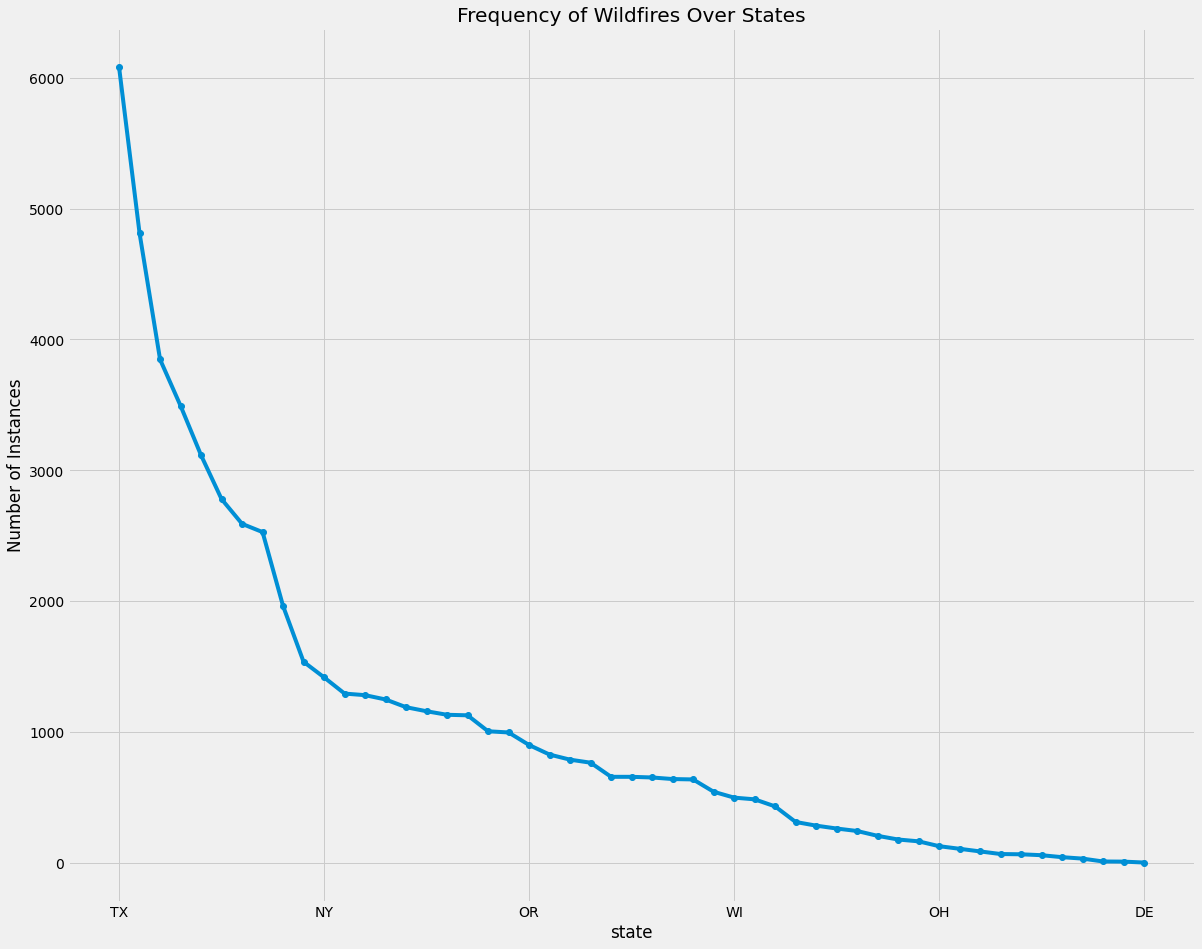

In [9]:
df_year = df[['state']]
df_year['state'].value_counts(sort=True).plot(kind="line",marker='o', figsize=(18,15))
plt.title('Frequency of Wildfires Over States')
plt.xlabel('state')
plt.ylabel('Number of Instances')
plt.show()

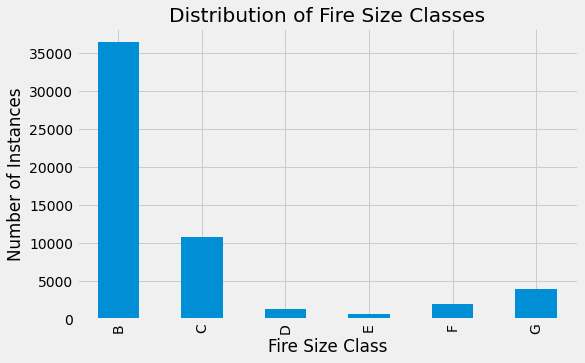

In [10]:
# Bar plot with FIRE_SIZE_CLASS grouping
df_size_class = df[['fire_size_class']]
df_size_class.groupby('fire_size_class').size().plot(kind='bar', figsize=(8,5))
plt.title('Distribution of Fire Size Classes')
plt.xlabel('Fire Size Class')
plt.ylabel('Number of Instances')
plt.show()

Text(0.5, 1.0, 'Graph showing number of wildfire per month')

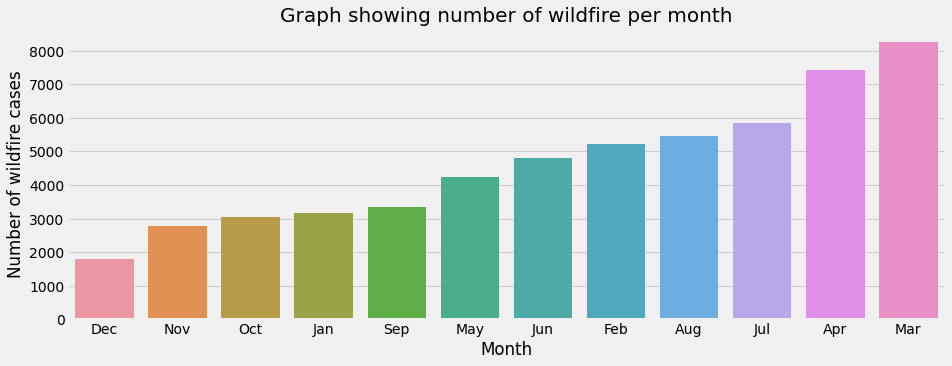

In [11]:
month_data = df.groupby(['discovery_month']).size().reset_index(name = 'count').sort_values('count')

# Creating barplot
plt.figure(figsize=(14,5))
g = sns.barplot(data = month_data, y = 'count', x = 'discovery_month')
plt.xlabel('Month')
plt.ylabel('Number of wildfire cases')
g.axes.set_title('Graph showing number of wildfire per month',fontsize=20)

In [12]:
df_copy = df

In [13]:
del df_copy['Unnamed: 0']

In [14]:
del df_copy['Unnamed: 0.1']

<AxesSubplot:>

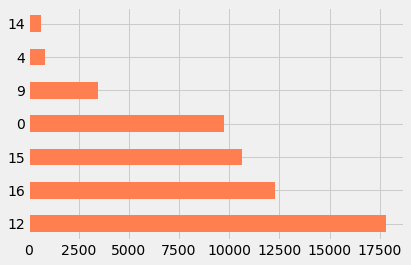

In [15]:
df['Vegetation'].value_counts().plot(kind='barh',color='coral')

##### Vegetation ,Dominant vegetation in the areas (1:Tropical Evergreen Broadleaf Forest,2:Tropical Deciduous Broadleaf Forest,3:Temperate Evergreen Broadleaf Forest ,4:Temperate Evergreen Needleleaf Forest TmpENF,5:Temperate Deciduous Broadleaf Forest,6:Boreal Evergreen Needleleaf Forest,7:Boreal Deciduous Needleleaf Forest, 8:Savanna , 9:C3 Grassland/Steppe, 10:C4 Grassland/Steppe, 11:Dense Shrubland 12:Open Shrubland, 13:Tundra Tundra, 14:Desert,15:Polar Desert/Rock/Ice, 16:Secondary Tropical Evergreen Broadleaf Forest, 17:Secondary Tropical Deciduous Broadleaf Forest, 18:Secondary Temperate Evergreen Broadleaf Forest, 19:Secondary Temperate Evergreen Needleleaf Forest 20:Secondary Temperate Deciduous Broadleaf Forest, 21:Secondary Boreal Evergreen Needleleaf Forest, 22:Secondary Boreal Deciduous Needleleaf Forest, 23:Water/Rivers Water 24:C3 Cropland, 25:C4 Cropland, 26:C3 Pastureland, 27:C4 Pastureland, 28:Urban land)

Text(0.5, 1.0, 'Graph showing size of wildfire per cause')

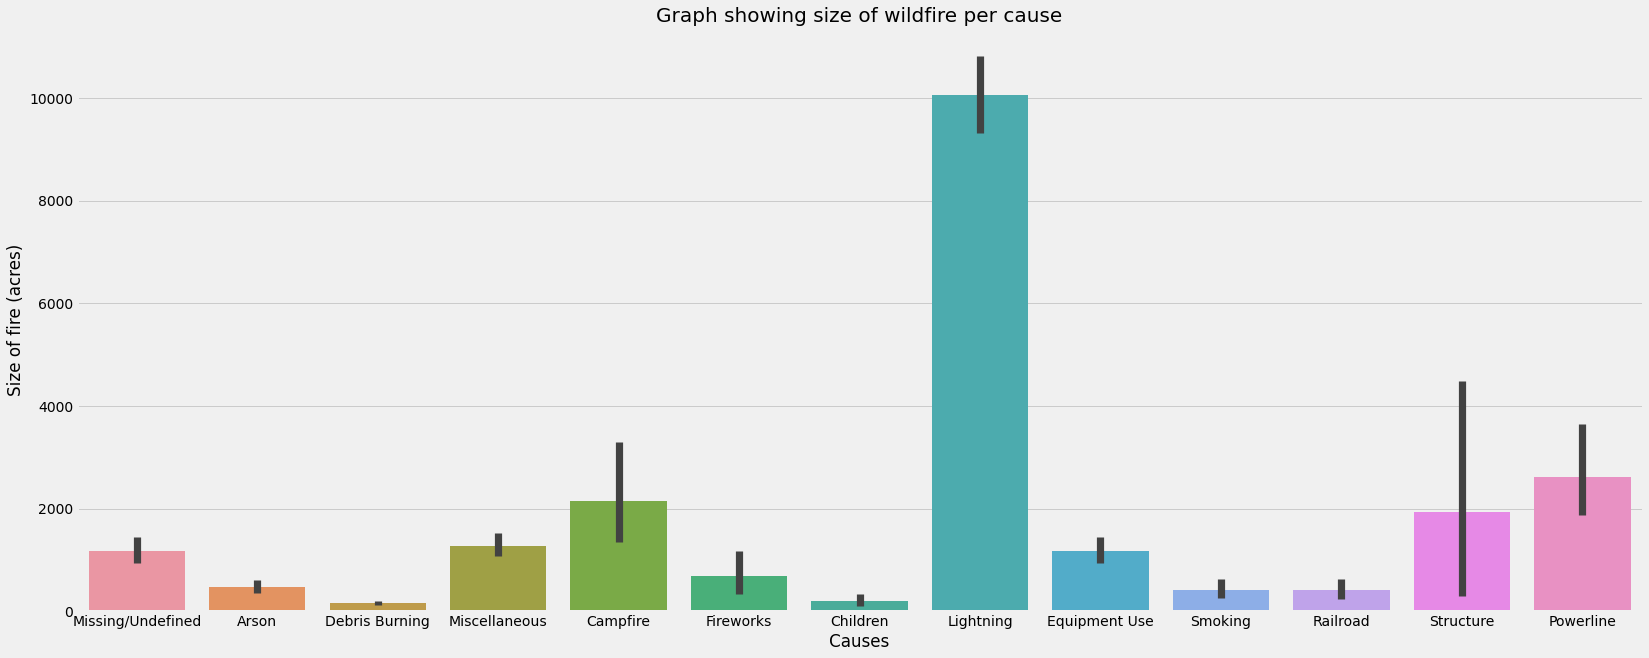

In [16]:
# Creating barplot
plt.figure(figsize=(25,10))
g = sns.barplot(data = df, y = 'fire_size', x = 'stat_cause_descr')
plt.xlabel('Causes')
plt.ylabel('Size of fire (acres)')
g.axes.set_title('Graph showing size of wildfire per cause',fontsize=20)

### 2.What states are the most and least fire-prone?

Text(0.5, 1.0, 'Graph showing number of wildfire per state')

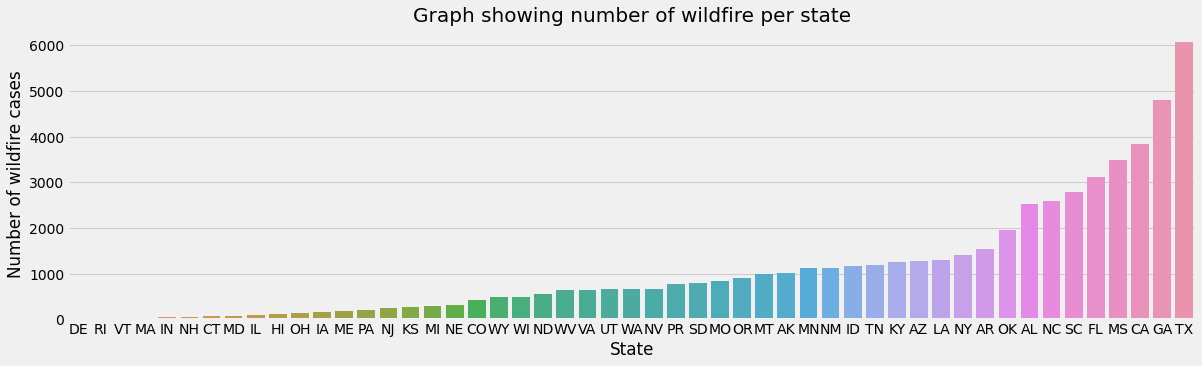

In [17]:
state_data = df.groupby(['state']).size().reset_index(name = 'count').sort_values('count')

# Creating barplot
plt.figure(figsize=(18,5))
g = sns.barplot(data = state_data, y = 'count', x = 'state')
plt.xlabel('State')
plt.ylabel('Number of wildfire cases')
g.axes.set_title('Graph showing number of wildfire per state',fontsize=20)

#### lets look at fire causes in top 3 states

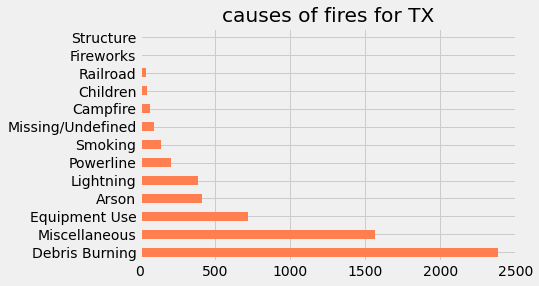

In [18]:
df_TX = df[df['state']=='TX']
df_TX['stat_cause_descr'].value_counts().plot(kind='barh',color='coral',title='causes of fires for TX')
plt.show()

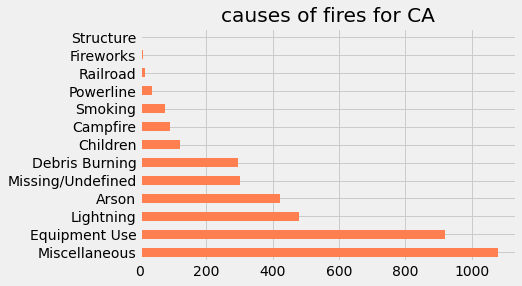

In [19]:
df_CA = df[df['state']=='CA']
df_CA['stat_cause_descr'].value_counts().plot(kind='barh',color='coral',title='causes of fires for CA')
plt.show()

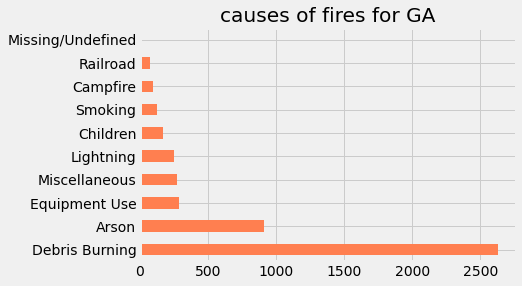

In [20]:
df_GA = df[df['state']=='GA']
df_GA['stat_cause_descr'].value_counts().plot(kind='barh',color='coral',title='causes of fires for GA')
plt.show()

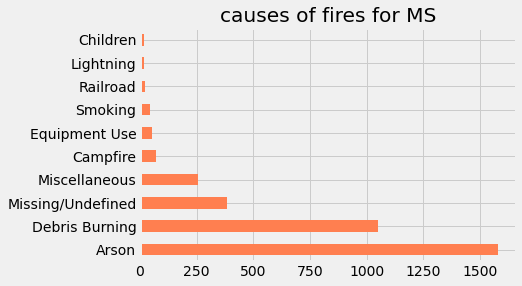

In [21]:
df_MS = df[df['state']=='MS']
df_MS['stat_cause_descr'].value_counts().plot(kind='barh',color='coral',title='causes of fires for MS')
plt.show()

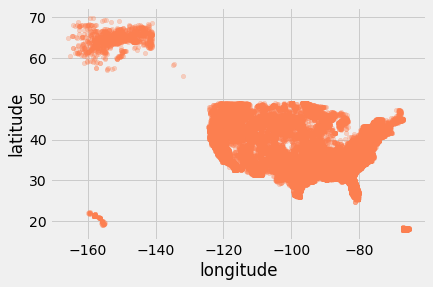

In [22]:
df.plot(kind='scatter',x='longitude',y='latitude',color='coral',alpha=0.3)
plt.show()

### Lets try to use ML to predict cause of fire 

In [23]:
from sklearn import tree, preprocessing

In [24]:
df=df_orig
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'fire_name', 'fire_size',
       'fire_size_class', 'stat_cause_descr', 'latitude', 'longitude', 'state',
       'disc_clean_date', 'cont_clean_date', 'discovery_month',
       'disc_date_final', 'cont_date_final', 'putout_time', 'disc_date_pre',
       'disc_pre_year', 'disc_pre_month', 'wstation_usaf', 'dstation_m',
       'wstation_wban', 'wstation_byear', 'wstation_eyear', 'Vegetation',
       'fire_mag', 'weather_file', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype='object')

#### Labelling the cause of fire, state and discovery month so we can fit a KNNClassifier model

In [25]:
le = preprocessing.LabelEncoder()
df['stat_cause_descr'] = le.fit_transform(df['stat_cause_descr'])
df['state'] = le.fit_transform(df['state'])
df['discovery_month'] = le.fit_transform(df['discovery_month'])
df.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,8,18.105072,-66.753044,38,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,0,35.038330,-87.610000,42,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,0,34.947800,-88.722500,24,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,3,39.641400,-119.308300,32,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,7,30.700600,-90.591400,17,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


#### Plotting a heat map to find correlation

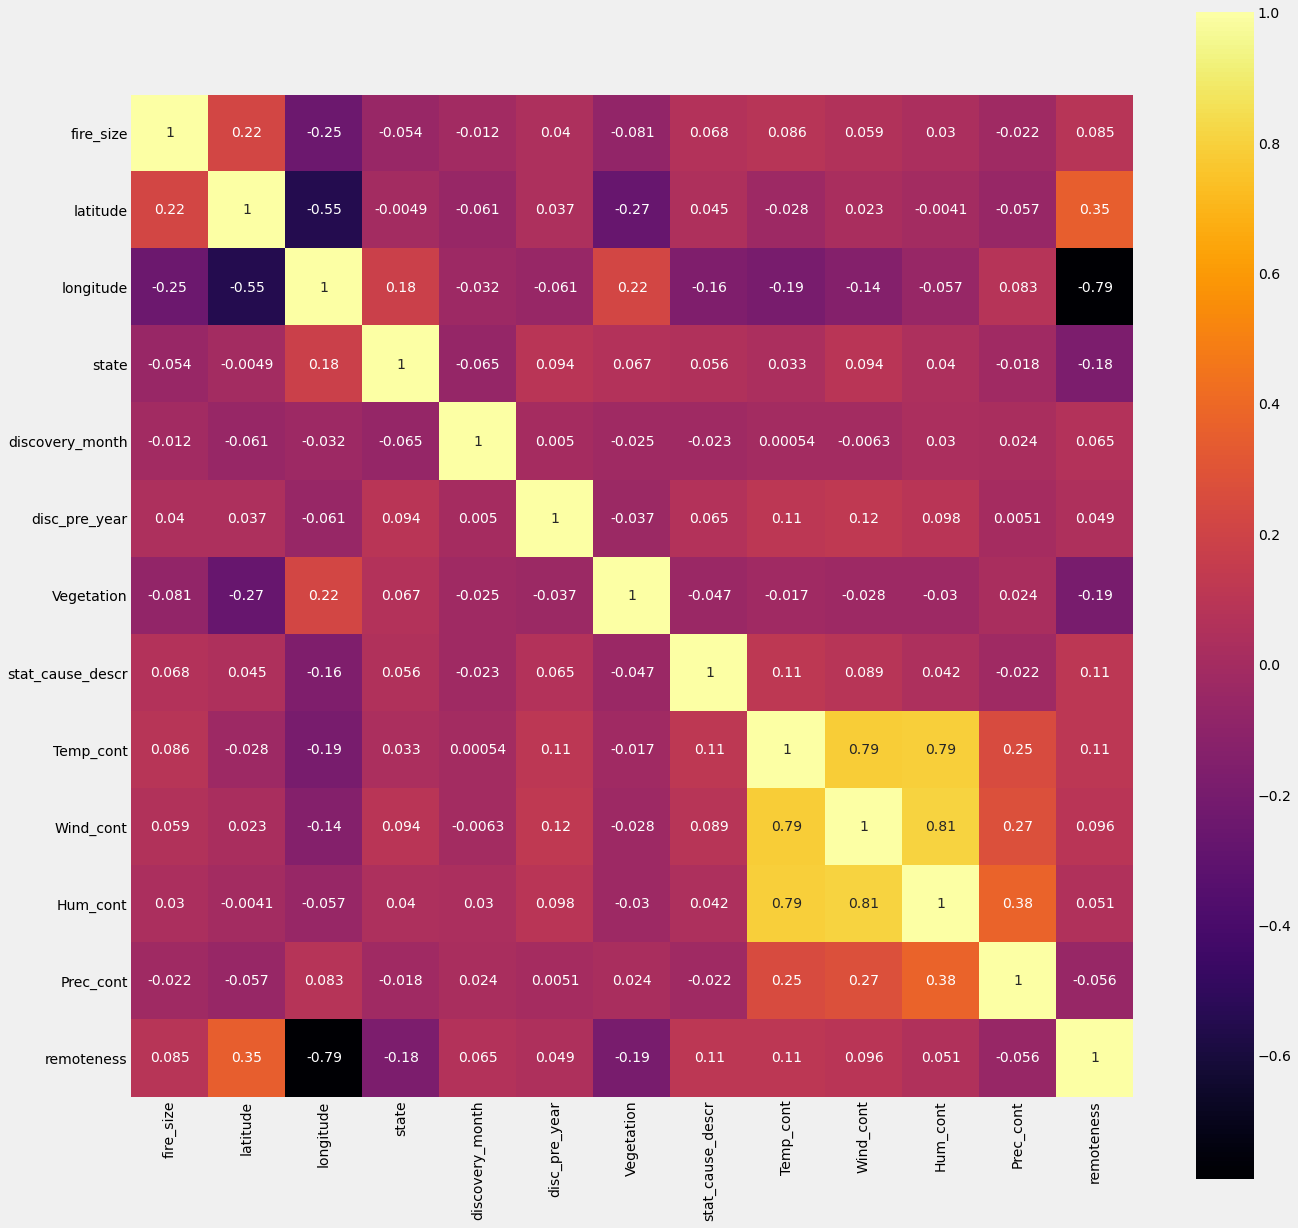

In [26]:
d=df[['fire_size', 'latitude', 'longitude', 'state', 'discovery_month','disc_pre_year', 'Vegetation', 'stat_cause_descr', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont','remoteness']]
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(d.corr(),annot=True,cmap='inferno',square=True,mask=False)

From the above heat map
* Strong correlation between temp, wind, humidity and precipitation

#### Dropping irrelavant columns and using the columns of our interest and strong correlation

In [27]:
df = df[['fire_size', 'latitude', 'longitude', 'state', 'discovery_month','disc_pre_year', 'stat_cause_descr', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont']]
df = df.dropna()

In [28]:
X = df.drop(['stat_cause_descr'], axis=1).values
y = df['stat_cause_descr'].values

##### Splitting the data for training, testing and validation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

#### trying to train a KNNClassifier model

In [30]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [31]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [32]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 45.53007043525375 % and k = [18]


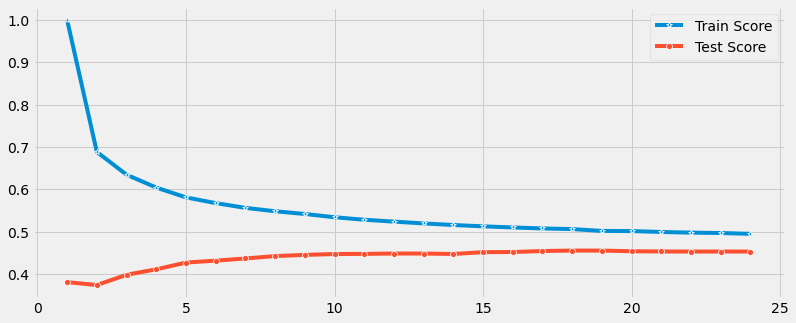

In [33]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')

In [34]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.4269459996387936

In [35]:
y_pred = knn.predict(X_test)

#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.47      0.41      2886
           1       0.15      0.09      0.11       421
           2       0.07      0.05      0.06       374
           3       0.43      0.54      0.48      4241
           4       0.21      0.14      0.17      1223
           5       0.24      0.06      0.09        71
           6       0.55      0.65      0.59      2422
           7       0.35      0.26      0.30      2541
           8       0.73      0.57      0.64      1604
           9       0.06      0.01      0.01       157
          10       0.34      0.16      0.22       291
          11       0.08      0.01      0.02       357
          12       0.00      0.00      0.00        23

    accuracy                           0.43     16611
   macro avg       0.27      0.23      0.24     16611
weighted avg       0.41      0.43      0.41     16611



##### From the above classification report
* Precision and recall are not high
* Our model can only correctly predict cause of fire with a 45% accuracy
* Furthermore with a recall of 44% the chance of wrong prediction of fire cause are moderately high

 K=18 is the most accurate rate because the error is closest to 0 


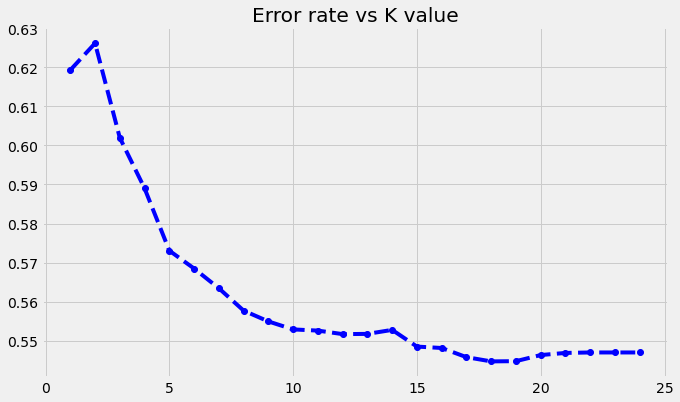

In [36]:
Error_Rate = []
for i in range (1,25):
    
    KNN_Error = KNeighborsClassifier(n_neighbors=i)
    KNN_Error.fit(X_train,y_train)
    pred_i = KNN_Error.predict(X_test)
    Error_Rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))

plt.plot(range(1,25), Error_Rate , color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error rate vs K value')
print( " K=18 is the most accurate rate because the error is closest to 0 ")    

#### as you see from above error rate vs k value graph, k=18 had minimum error rate

#### Now that KNNClassifier performed not to our expectation, lets try using RandomForestClassifier

In [37]:
df = pd.read_csv("WildFires.csv")
df_orig = df.copy() 

In [38]:
df.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [39]:
le = preprocessing.LabelEncoder()
df['stat_cause_descr'] = le.fit_transform(df['stat_cause_descr'])
df['state'] = le.fit_transform(df['state'])
df['discovery_month'] = le.fit_transform(df['discovery_month'])
df.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,8,18.105072,-66.753044,38,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,0,35.038330,-87.610000,42,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,0,34.947800,-88.722500,24,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,3,39.641400,-119.308300,32,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,7,30.700600,-90.591400,17,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [40]:
df = df[['fire_size', 'latitude', 'longitude', 'state', 'discovery_month','disc_pre_year', 'stat_cause_descr', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont']]
df = df.dropna()
df.head()

,fire_size,latitude,longitude,state,discovery_month,disc_pre_year,stat_cause_descr,Temp_cont,Wind_cont,Hum_cont,Prec_cont
0,10.0,18.105072,-66.753044,38,3,2007,8,24.527961,3.250413,78.724370,0.0
1,3.0,35.038330,-87.610000,42,2,2006,0,10.448298,2.122320,81.682678,86.8
2,60.0,34.947800,-88.722500,24,3,2004,0,13.696600,3.369050,65.063800,124.5
3,1.0,39.641400,-119.308300,32,6,2005,3,0.000000,0.000000,0.000000,0.0
4,2.0,30.700600,-90.591400,17,11,1999,7,-1.000000,-1.000000,-1.000000,-1.0


In [41]:
X = df.drop(['stat_cause_descr'], axis=1).values
y = df['stat_cause_descr'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [42]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5285654084642707


##### Our fire causes have too many classes, lets try to narrow them down

In [43]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

df['label'] = df_orig['stat_cause_descr'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel
df = df.drop('stat_cause_descr',axis=1)
print(df.head())

   fire_size   latitude   longitude  state  discovery_month  disc_pre_year  \
0       10.0  18.105072  -66.753044     38                3           2007   
1        3.0  35.038330  -87.610000     42                2           2006   
2       60.0  34.947800  -88.722500     24                3           2004   
3        1.0  39.641400 -119.308300     32                6           2005   
4        2.0  30.700600  -90.591400     17               11           1999   

   Temp_cont  Wind_cont   Hum_cont  Prec_cont  label  
0  24.527961   3.250413  78.724370        0.0      4  
1  10.448298   2.122320  81.682678       86.8      3  
2  13.696600   3.369050  65.063800      124.5      3  
3   0.000000   0.000000   0.000000        0.0      2  
4  -1.000000  -1.000000  -1.000000       -1.0      4  


In [44]:
X = df.drop(['label'], axis=1).values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.64174342303293


In [45]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[1797  418   55  152]
 [ 341 5444  717  656]
 [  79 1341 1241  225]
 [ 309 1457  223 2156]]


In [46]:
y_pred = clf_rf.predict(X_test)

#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.74      0.73      2422
           2       0.63      0.76      0.69      7158
           3       0.56      0.43      0.48      2886
           4       0.68      0.52      0.59      4145

    accuracy                           0.64     16611
   macro avg       0.64      0.61      0.62     16611
weighted avg       0.64      0.64      0.63     16611



#### from the above classification report
* our RandomForestClassifier performed better than KNNClassifier
* It had much better accuracy at predicting the cause of the fire
* Both the precision and recall values support the above fact

#### Can we try to predict more accurately if we drop `Miscellenous` type for fire cause?

Text(0.5, 1.0, 'Graph showing size of wildfire per cause')

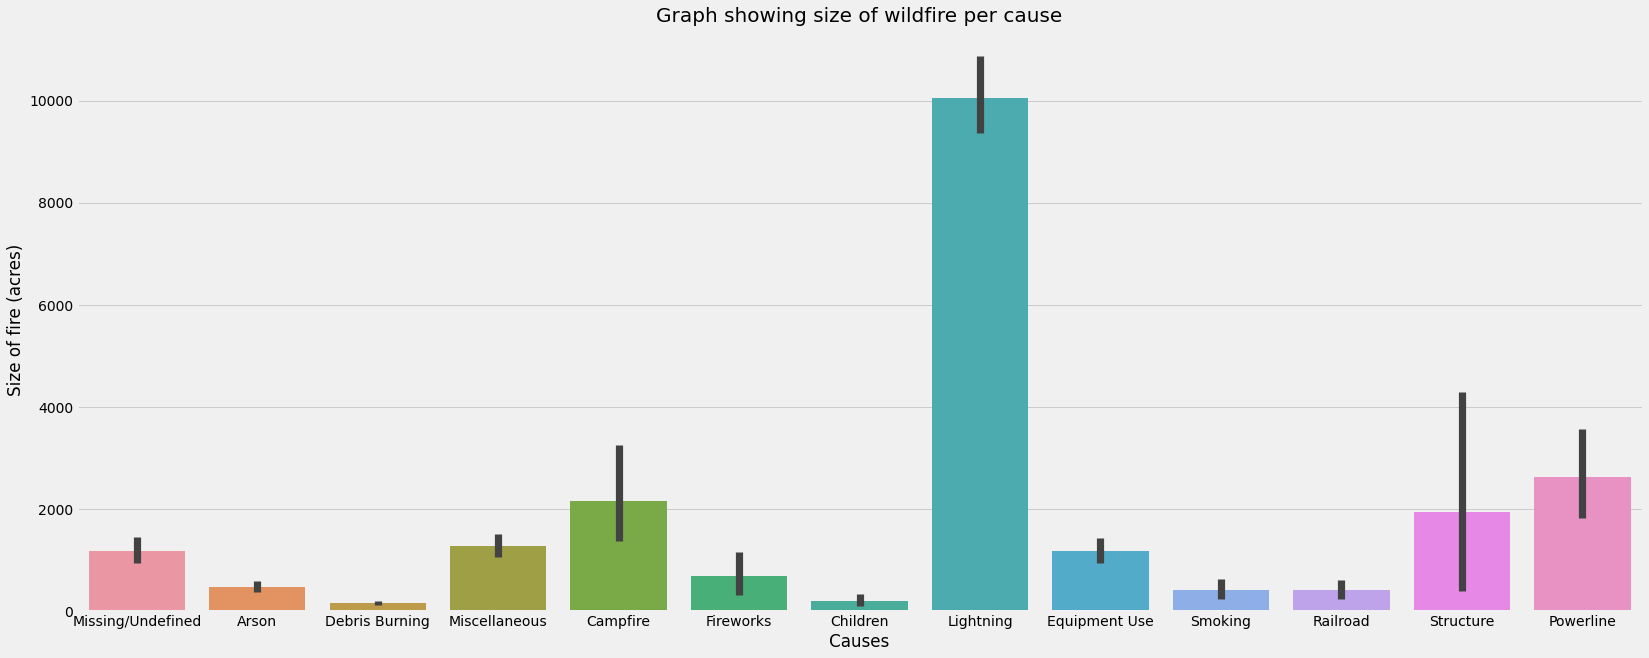

In [60]:
plt.figure(figsize=(25,10))
g = sns.barplot(data = df_orig, y = 'fire_size', x = 'stat_cause_descr')
plt.xlabel('Causes')
plt.ylabel('Size of fire (acres)')
g.axes.set_title('Graph showing size of wildfire per cause',fontsize=20)

In [115]:
stat_cause_descr_sub_cat = ['Miscellaneous', 'Missing/Undefined']
df_1=df_orig[~df_orig['stat_cause_descr'].isin(stat_cause_descr_sub_cat)]

In [116]:
df_1['label'] = df_1['stat_cause_descr'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel

df_1.drop('stat_cause_descr', axis=1)

df_1.head()

df_1['stat_cause_descr'] = le.fit_transform(df_1['stat_cause_descr'])
df_1['state'] = le.fit_transform(df_1['state'])
df_1['discovery_month'] = le.fit_transform(df_1['discovery_month'])
df_1.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,label
1,1,1,NaN,3.0,B,0,35.038330,-87.610000,42,12/11/2006,...,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355,3
2,2,2,NaN,60.0,C,0,34.947800,-88.722500,24,2/29/2004,...,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544,3
3,3,3,WNA 1,1.0,B,3,39.641400,-119.308300,32,6/6/2005,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,2
5,5,5,NaN,1.0,B,3,32.063900,-82.417800,9,3/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.139643,2
6,6,6,NaN,5.2,B,3,31.316978,-83.393649,9,1/10/2009,...,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904,2


In [122]:
X = df_1[['fire_size', 'latitude', 'longitude', 'state', 'discovery_month','disc_pre_year', 'stat_cause_descr', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont', 'label']].drop(['label'], axis=1).values
y = df_1['label'].values


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
clf_rf = ske.RandomForestClassifier(n_estimators=10)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.9996822370511599


In [124]:
y_pred = clf_rf.predict(X_test)

#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2474
           2       1.00      1.00      1.00      7258
           3       1.00      1.00      1.00      2856

    accuracy                           1.00     12588
   macro avg       1.00      1.00      1.00     12588
weighted avg       1.00      1.00      1.00     12588

